In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Titanic-Dataset.csv' )


In [248]:
df.head(40)

,TPassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [249]:
df. describe()

,TPassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TPassengerId  891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [251]:
df['PrimeiraClasse'] = df['Pclass'] == 1
df['SegundaClasse'] = df['Pclass'] == 2
df['TerceiraClasse'] = df['Pclass'] == 3
df = df.drop('Pclass', axis=1)


In [252]:

df['NaoTemCabine'] = df['Cabin'].isna()
df.head(20)

,TPassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PrimeiraClasse,SegundaClasse,TerceiraClasse,NaoTemCabine
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,True
5,6,0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,False,True,True
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False,False,False
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,False,True,True
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False,False,True,True
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,True


In [253]:
df.corr(numeric_only=True)

,TPassengerId,Survived,Age,SibSp,Parch,Fare,PrimeiraClasse,SegundaClasse,TerceiraClasse,NaoTemCabine
TPassengerId,1.000000,-0.005007,0.036847,-0.057527,-0.001652,0.012658,0.034303,-0.000086,-0.029486,-0.019919
Survived,-0.005007,1.000000,-0.077221,-0.035322,0.081629,0.257307,0.285904,0.093349,-0.322308,-0.316912
Age,0.036847,-0.077221,1.000000,-0.308247,-0.189119,0.096067,0.348941,0.006954,-0.312271,-0.249732
SibSp,-0.057527,-0.035322,-0.308247,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,0.040460
Parch,-0.001652,0.081629,-0.189119,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,-0.036987
Fare,0.012658,0.257307,0.096067,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,-0.482075
PrimeiraClasse,0.034303,0.285904,0.348941,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,-0.788773
SegundaClasse,-0.000086,0.093349,0.006954,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,0.172413
TerceiraClasse,-0.029486,-0.322308,-0.312271,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,0.539291
NaoTemCabine,-0.019919,-0.316912,-0.249732,0.040460,-0.036987,-0.482075,-0.788773,0.172413,0.539291,1.000000


In [254]:
df.loc[df['Survived'] == 1 ]


,TPassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PrimeiraClasse,SegundaClasse,TerceiraClasse,NaoTemCabine
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False,False
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False,False,True,True
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,False,False,True,True
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,True,False,False,False
880,881,1,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,False,True,False,True
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True,False,False,False


In [255]:
df.loc[df['NaoTemCabine'] == False].count() / df.loc[df['Survived'] == 1].count()


TPassengerId      0.596491
Survived          0.596491
Name              0.596491
Sex               0.596491
Age               0.637931
SibSp             0.596491
Parch             0.596491
Ticket            0.596491
Fare              0.596491
Cabin             1.500000
Embarked          0.594118
PrimeiraClasse    0.596491
SegundaClasse     0.596491
TerceiraClasse    0.596491
NaoTemCabine      0.596491
dtype: float64

In [256]:
df.loc[df['Survived'] == 1 ].loc[df['NaoTemCabine'] == False].loc[df['PrimeiraClasse'] == True]

,TPassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PrimeiraClasse,SegundaClasse,TerceiraClasse,NaoTemCabine
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False,False
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,True,False,False,False
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,True,False,False,False
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,True,False,False,False
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,True,False,False,False
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,True,False,False,False
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True,False,False,False


In [257]:
df.head(10)

,TPassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PrimeiraClasse,SegundaClasse,TerceiraClasse,NaoTemCabine
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,True
5,6,0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,False,True,True
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False,False,False
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,False,True,True
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False,False,True,True
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,True


In [258]:
import numpy as np
df['letraCabine'] = df['Cabin'].str.extract(r'([A-Za-z]*)')
df['numeroCabine'] = df['Cabin'].str.extract(r'([0-9]*$)')
# df['numeroCabine'].astype(float, errors='ignore') 
# df['numeroCabine'] = df['numeroCabine'].fillna(0, inplace=True)
# # df['numeroCabine'] = df['numeroCabine'].astype('int64', errors='ignore').dtype
# df.astype({'numeroCabine':np.float64}).dtypes

df.head(10)

,TPassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PrimeiraClasse,SegundaClasse,TerceiraClasse,NaoTemCabine,letraCabine,numeroCabine
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,True,NaN,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,False,C,85
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,True,NaN,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False,False,C,123
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,True,NaN,NaN
5,6,0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,False,True,True,NaN,NaN
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False,False,False,E,46
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,False,True,True,NaN,NaN
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False,False,True,True,NaN,NaN
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,True,NaN,NaN


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TPassengerId    891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Name            891 non-null    object 
 3   Sex             891 non-null    object 
 4   Age             714 non-null    float64
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Ticket          891 non-null    object 
 8   Fare            891 non-null    float64
 9   Cabin           204 non-null    object 
 10  Embarked        889 non-null    object 
 11  PrimeiraClasse  891 non-null    bool   
 12  SegundaClasse   891 non-null    bool   
 13  TerceiraClasse  891 non-null    bool   
 14  NaoTemCabine    891 non-null    bool   
 15  letraCabine     204 non-null    object 
 16  numeroCabine    204 non-null    object 
dtypes: bool(4), float64(2), int64(4), o

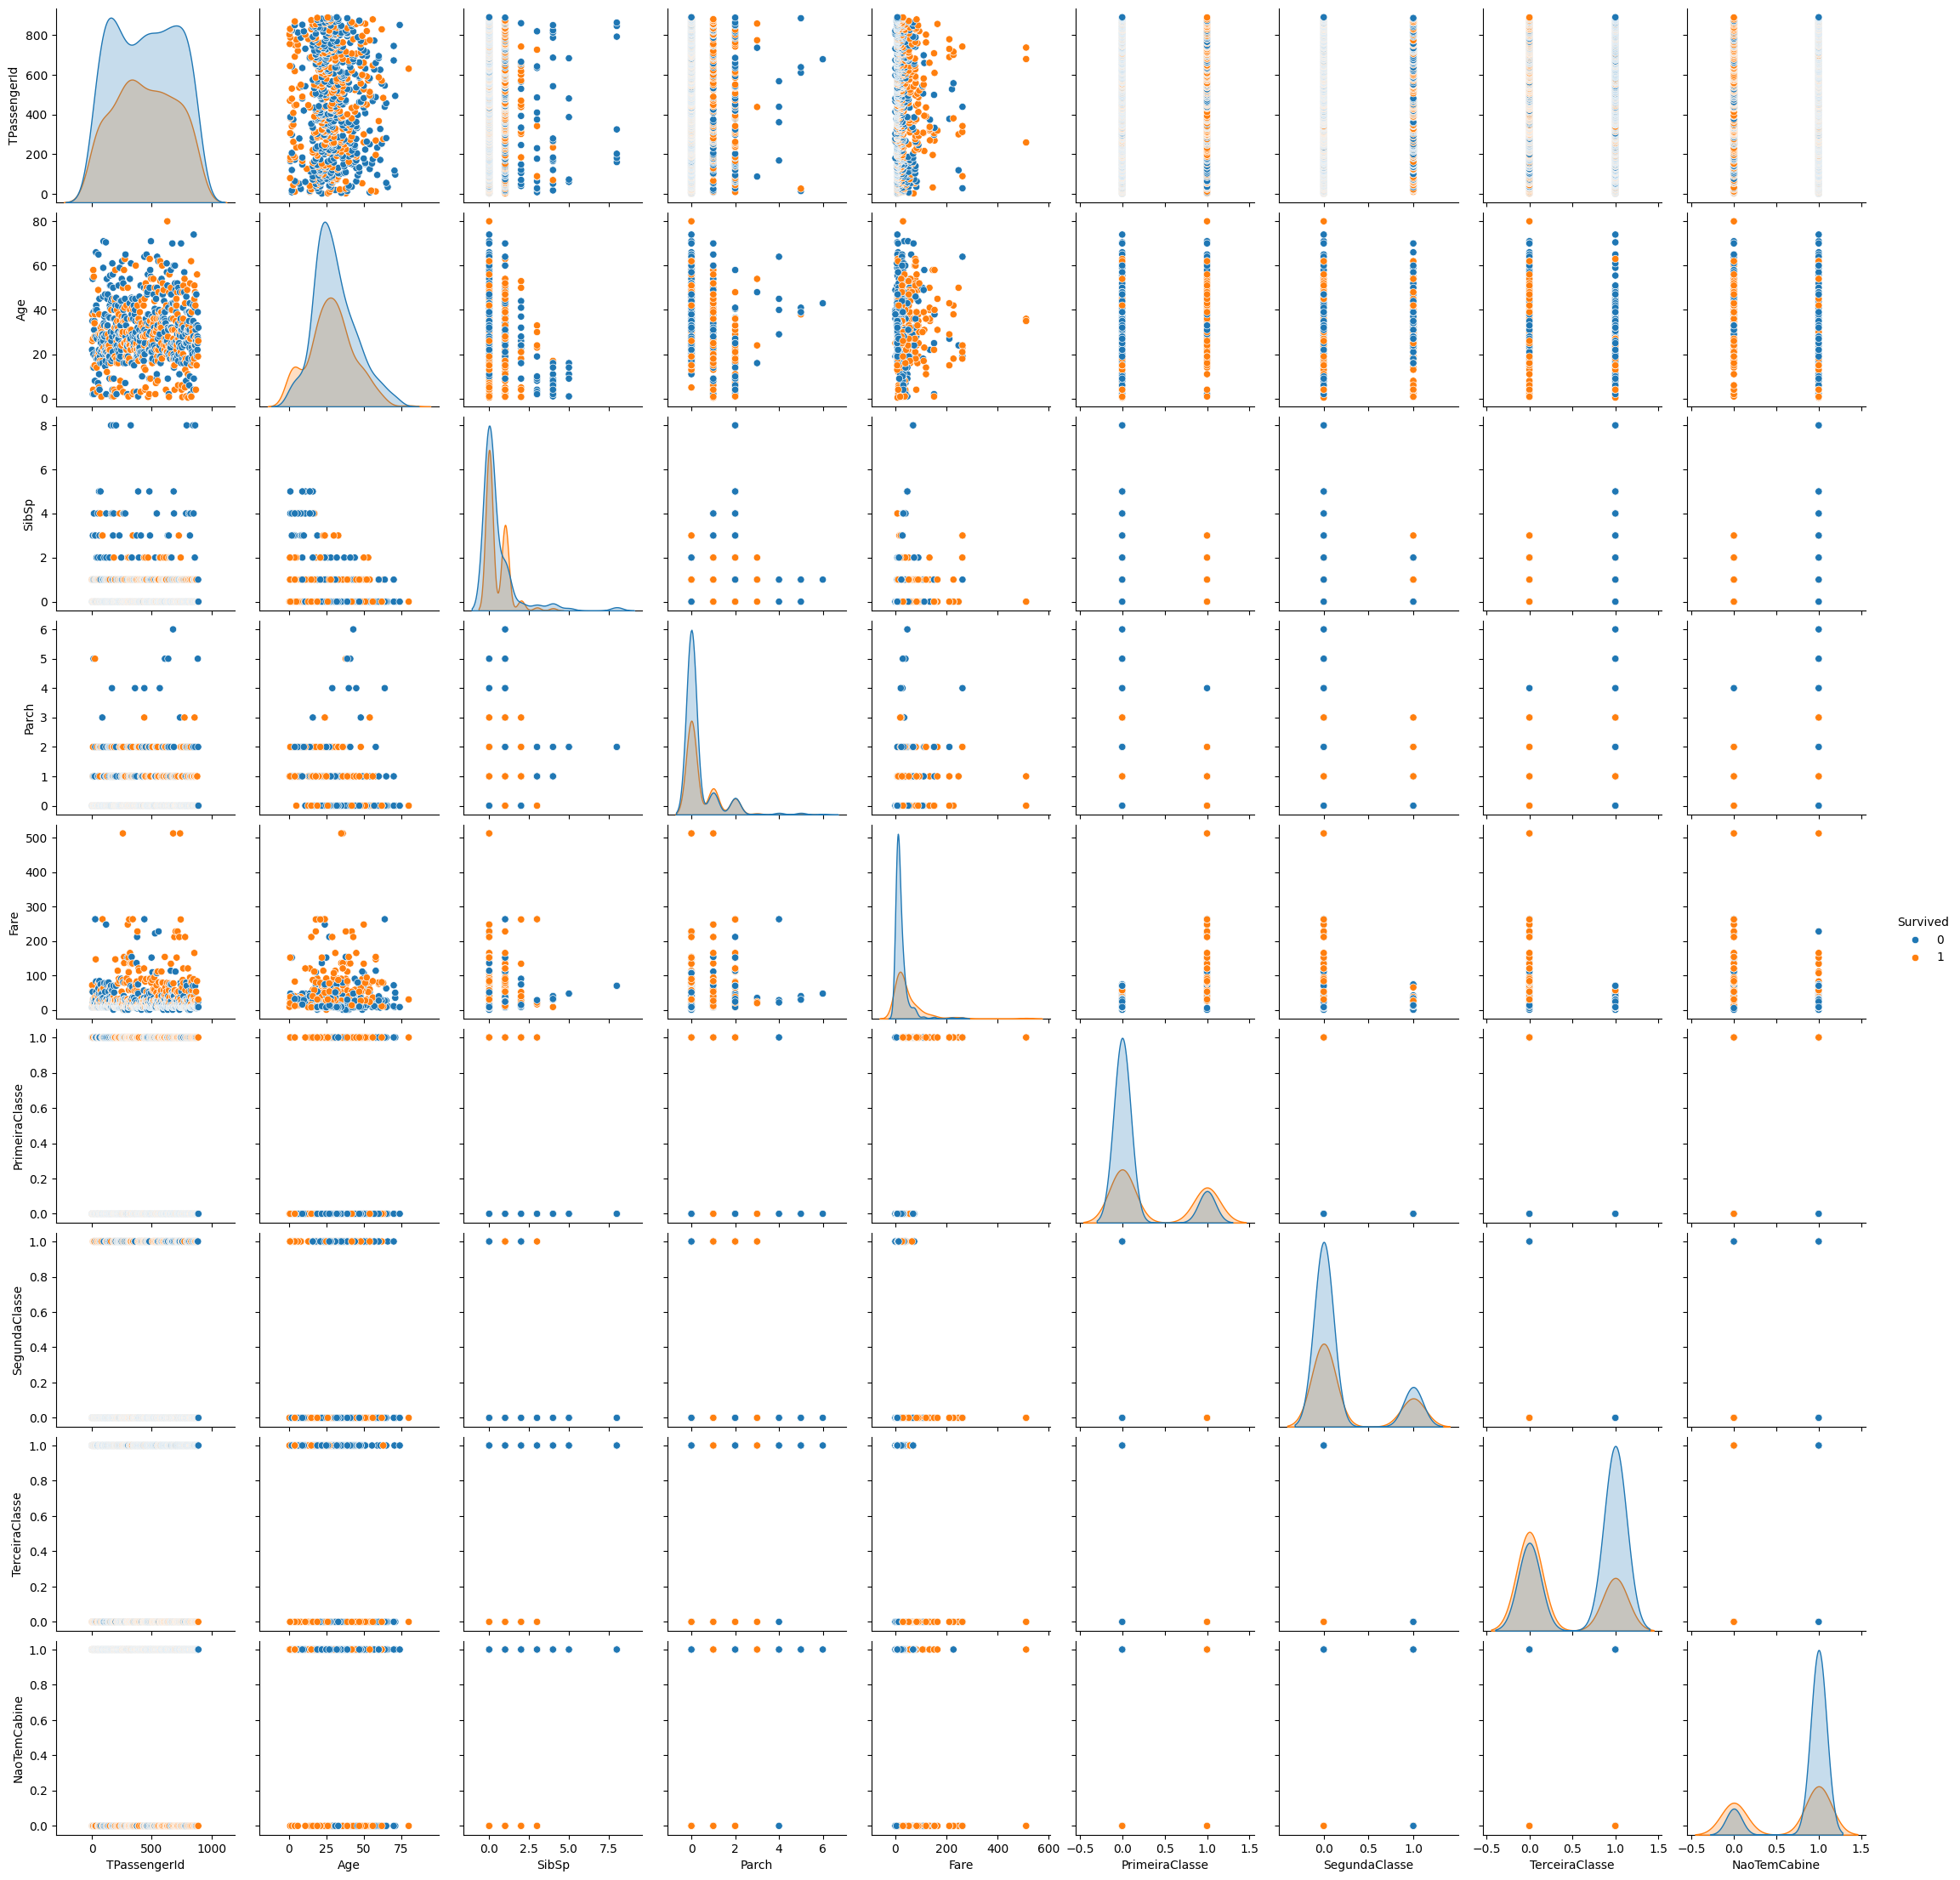

In [260]:
sns.pairplot(df, hue='Survived')


<Axes: >

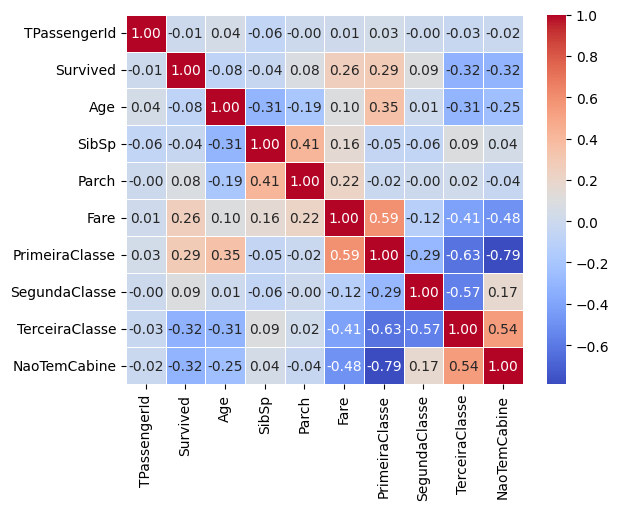

In [281]:
sns.heatmap(df.corr(numeric_only=True, ), annot=True, linewidths=0.5, cmap='coolwarm', fmt='.2f')